<a href="https://colab.research.google.com/github/noureldinmo/CognoRise-infotech/blob/main/MNIST_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from google.colab import files


uploaded = files.upload()

Saving train.csv to train.csv


In [7]:
# Show the first 5 rows of the dataset
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Split features and labels
X = data.drop(columns=['label']).values
y = data['label'].values

In [16]:
# Normalize the pixel values
X = X / 255.0

# Reshape the data to fit the model
X = X.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=10)

In [10]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

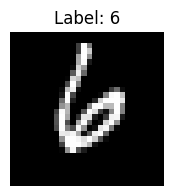

In [21]:
# Visualize a sample digit
plt.figure(figsize=(2,2))
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Label: {np.argmax(y_train[0])}')
plt.axis('off')
plt.show()

**Build the CNN Model**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train & Evaluate the Model**

In [13]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

Epoch 1/10
263/263 [==============================] - 30s 110ms/step - loss: 0.4369 - accuracy: 0.8645 - val_loss: 0.1031 - val_accuracy: 0.9673
Epoch 2/10
263/263 [==============================] - 28s 106ms/step - loss: 0.1403 - accuracy: 0.9576 - val_loss: 0.0735 - val_accuracy: 0.9771
Epoch 3/10
263/263 [==============================] - 26s 98ms/step - loss: 0.0955 - accuracy: 0.9722 - val_loss: 0.0635 - val_accuracy: 0.9790
Epoch 4/10
263/263 [==============================] - 27s 103ms/step - loss: 0.0807 - accuracy: 0.9744 - val_loss: 0.0448 - val_accuracy: 0.9868
Epoch 5/10
263/263 [==============================] - 28s 107ms/step - loss: 0.0681 - accuracy: 0.9790 - val_loss: 0.0411 - val_accuracy: 0.9873
Epoch 6/10
263/263 [==============================] - 28s 107ms/step - loss: 0.0595 - accuracy: 0.9819 - val_loss: 0.0415 - val_accuracy: 0.9863
Epoch 7/10
263/263 [==============================] - 28s 107ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0386 - val_acc

In [14]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.4f}')

263/263 [==============================] - 3s 12ms/step - loss: 0.0335 - accuracy: 0.9892
Validation Accuracy: 0.9892


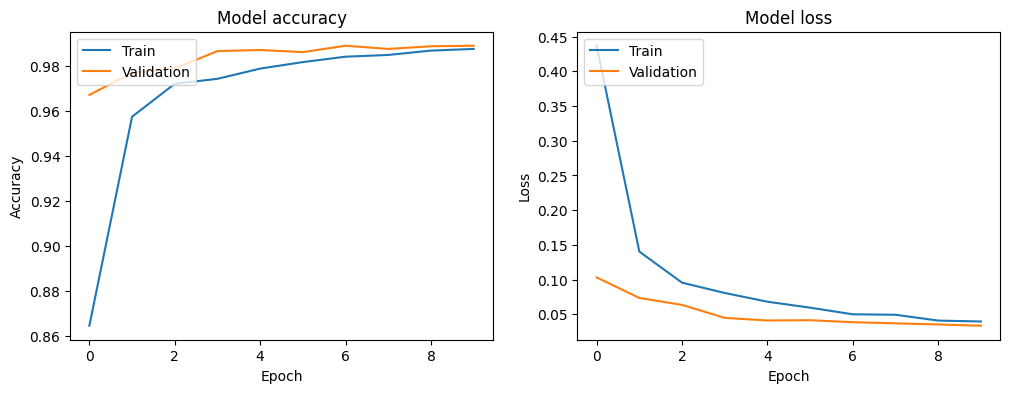

In [15]:
# Optionally, visualize the training process
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()